# Intro

## Features

### Popularity indicators
- stargazers_count -> number of stars
- forks_count
- subscribers_count
- downloads count for 2015 and 2016
- average month downloads for last year
- downloads for last month
- downloads for last week

### Features of projects
- size
- dependencies_count
- mainteiners_count
- contributors_count
- has_tests
- has_readme
- open_issues_count

In [1]:
import numpy as np

In [2]:
# Helper function
from IPython.display import Markdown, display
def printmd(string):
    '''
    helper print function that prints markdown
    '''
    display(Markdown(string))

In [3]:
import shared

X, Y, X_labels, Y_labels = shared.fetch_data()

Connected to DB


In [5]:
# here we take a look at how many packages have tests and how many of them have readme file

column_sum = np.sum(X, axis=0)
has_tests_total = column_sum[shared.HAS_TESTS]
has_readme_total = column_sum[shared.HAS_README]
total = X.shape[0]
print("Packages that have tests: {} / {}".format(has_tests_total, total))
print("Packages that have readme file: {} / {}".format(has_readme_total, total))
# Numer of repos that have test 
# and number of repos that have readme

Packages that have tests: 106661.0 / 139488
Packages that have readme file: 126201.0 / 139488


In [6]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.0f' % x)
dataframe = pd.DataFrame.from_records(data=np.concatenate([X, Y], axis=1), columns=X_labels + Y_labels)
file_handle = open('data.csv', 'w')
dataframe.to_csv(path_or_buf=file_handle)
dataframe.describe()
# basic analysis on all properties, features and popularity indicators.

,open_issues_count,size,dependencies_count,mainteiners_count,contributors_count,has_tests,has_readme,stars,forks,subscribers,downloads,avg_per_month,last_month_downloads,last_week_downloads
count,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488
mean,2,974,3,1,0,1,1,44,7,5,397430,20478,36701,9966
std,19,10327,4,1,5,0,0,591,155,46,6422534,323927,556648,152214
min,0,0,0,0,0,0,0,0,0,0,31,10,3,1
25%,0,20,0,1,0,1,1,0,0,1,353,32,17,4
50%,0,128,1,1,0,1,1,1,0,1,911,73,42,10
75%,1,220,3,1,0,1,1,5,1,2,2806,203,162,40
max,2417,1413899,130,66,587,1,1,98280,43605,6318,396933770,19846688,36851932,11355842


### Open issues count

Quartiles suggest that most of the repos have no issues opened at all.


### Size

Size of repos can vary alot since min is 0 and ma is 1413899. 
However quartiles that size of most of the repos is in lower values, under 128.


### Dependencies count

Most of the projects keep the dependencies low.


### Maintainers count

Most of the projects have one maintainer.


### Contributors count

Most of the projects have no contributors.


### Has tests / has readme 

These are discussed above.


### Stars

Most of the projects have less than 5 stars.

### Forks

Most of the projects have 1 or less than 1 fork.

### Subsribers

Most of the projects have less than 2 subscribers


### Downloads

All numbers of downloads are distributed unevenly.



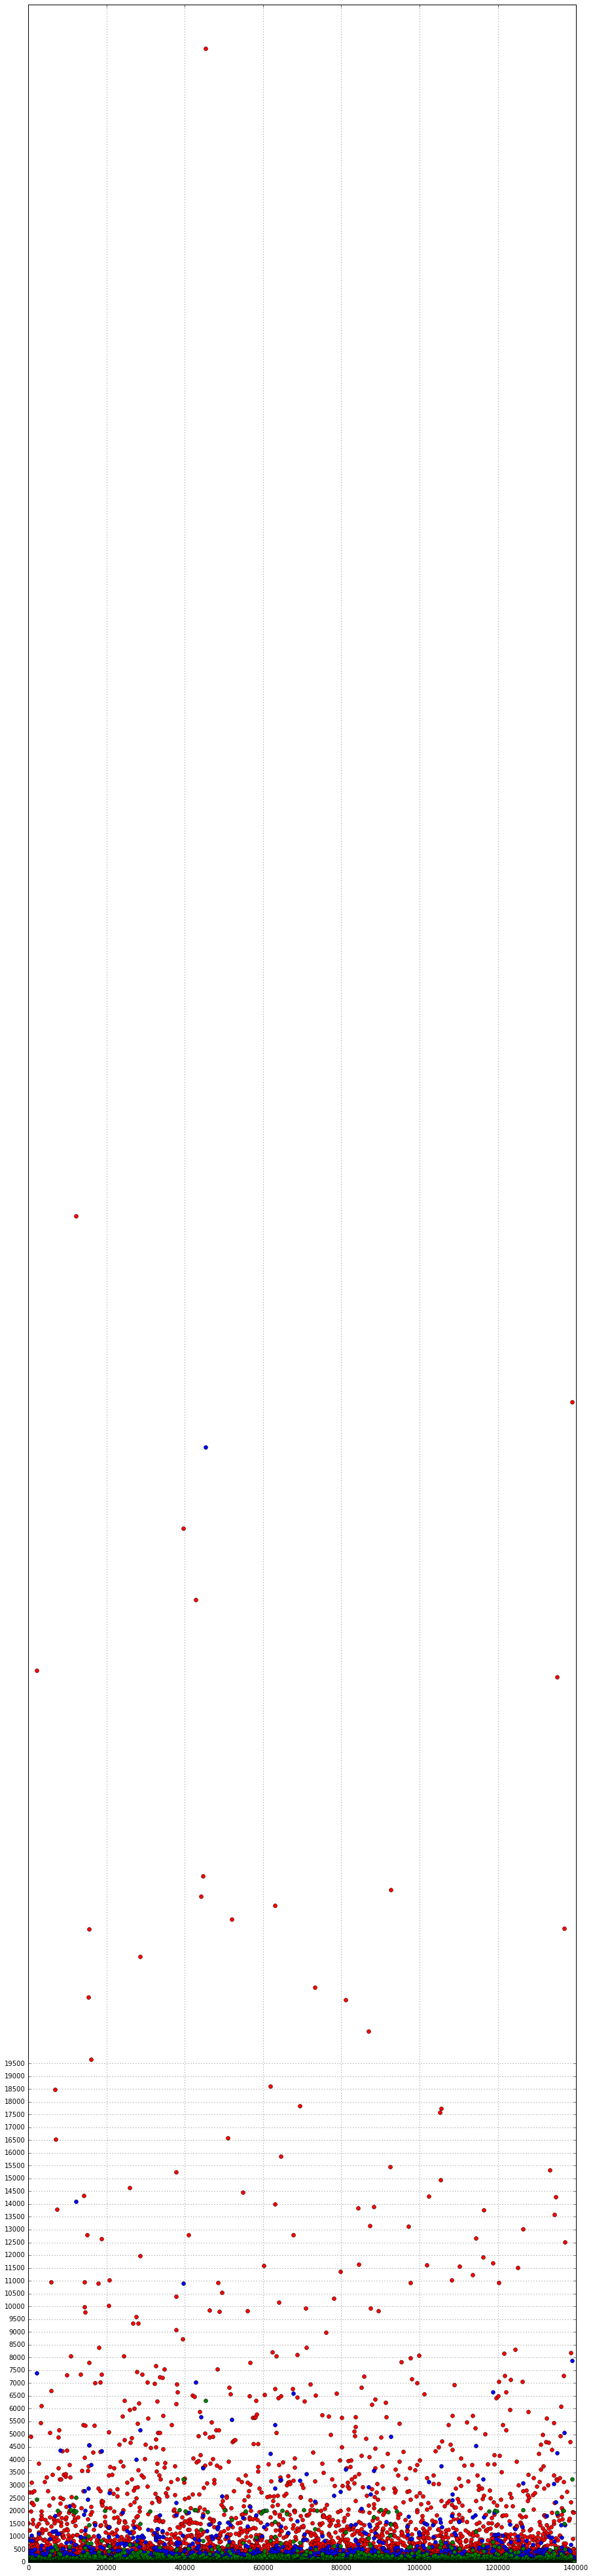

In [7]:
# the following plot helps to see distribution of value
# we made the graph very high so the distribution can be viewed better

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 70))
plt.plot(Y[:, shared.STARS], 'ro')
plt.plot(Y[:, shared.FORKS], 'bo')
plt.plot(Y[:, shared.SUBSCRIBERS], 'go')
plt.yticks( np.arange(0, 20000, 500.0))
plt.grid()
plt.show()

In the graph above we can see that red dots (number of stars) stand out and differentiate the repos the most. Even though most of the repos have very low stars count.

In [8]:
# helper functions
from scipy import stats

def print_mean(X):
    '''
    Calculates and prints mean.
    '''
    printmd("**Mean**: {}".format(np.mean(X)))
    
def print_mode(X):
    '''
    Calculates and prints mode.
    '''
    printmd("**Mode**: {}".format(stats.mode(X)))

def print_analysis(X):
    '''
    Prints various properties of X.
    Mean, mode.
    '''
    print_mean(X)
    print_mode(X)

# Analyzing more feature and target properties

In [9]:
# analyzing popularity features

printmd("### Stars")
print_analysis(Y[:, shared.STARS])

printmd("### Forks")
print_analysis(Y[:, shared.FORKS])

printmd("### Subribers")
print_analysis(Y[:, shared.SUBSCRIBERS])

printmd("### Downloads")
print_analysis(Y[:, shared.TOTAL_DOWNLOADS])

printmd("### Avg downloads")
print_analysis(Y[:, shared.AVERAGE_PER_MONTH_DOWNLOADS])

printmd("### Last month downloads")
print_analysis(Y[:, shared.LAST_MONTH_DOWNLOADS])

printmd("### Last week downloads")
print_analysis(Y[:, shared.LAST_WEEK_DOWNLOADS])

### Stars

**Mean**: 43.70875630878642

**Mode**: ModeResult(mode=array([ 0.]), count=array([59119]))

### Forks

**Mean**: 7.442303280568938

**Mode**: ModeResult(mode=array([ 0.]), count=array([87036]))

### Subribers

**Mean**: 5.385631738930948

**Mode**: ModeResult(mode=array([ 1.]), count=array([79876]))

### Downloads

**Mean**: 397430.19895618263

**Mode**: ModeResult(mode=array([ 266.]), count=array([199]))

### Avg downloads

**Mean**: 20477.609397952023

**Mode**: ModeResult(mode=array([ 15.]), count=array([378]))

### Last month downloads

**Mean**: 36701.05917354898

**Mode**: ModeResult(mode=array([ 8.]), count=array([4325]))

### Last week downloads

**Mean**: 9966.244931463638

**Mode**: ModeResult(mode=array([ 1.]), count=array([14568]))

In [10]:
# analyzing project features

printmd("### Open issues count")
print_analysis(X[:, shared.OPEN_ISSUES_COUNT])

printmd("### Size")
print_analysis(X[:, shared.SIZE])

printmd("### Dependencies")
print_analysis(X[:, shared.DEPENDENCIES_COUNT])

printmd("### Mainteiners")
print_analysis(X[:, shared.MAINTAINERS_COUNT])

printmd("### Contributors")
print_analysis(X[:, shared.CONTRIBUTORS_COUNT])

### Open issues count

**Mean**: 2.059259577884836

**Mode**: ModeResult(mode=array([ 0.]), count=array([100342]))

### Size

**Mean**: 973.5284899059417

**Mode**: ModeResult(mode=array([ 3.]), count=array([2730]))

### Dependencies

**Mean**: 2.676452454691443

**Mode**: ModeResult(mode=array([ 0.]), count=array([43683]))

### Mainteiners

**Mean**: 1.175893266804313

**Mode**: ModeResult(mode=array([ 1.]), count=array([127768]))

### Contributors

**Mean**: 0.2520933700389998

**Mode**: ModeResult(mode=array([ 0.]), count=array([129569]))

# Visualizing dataset properties

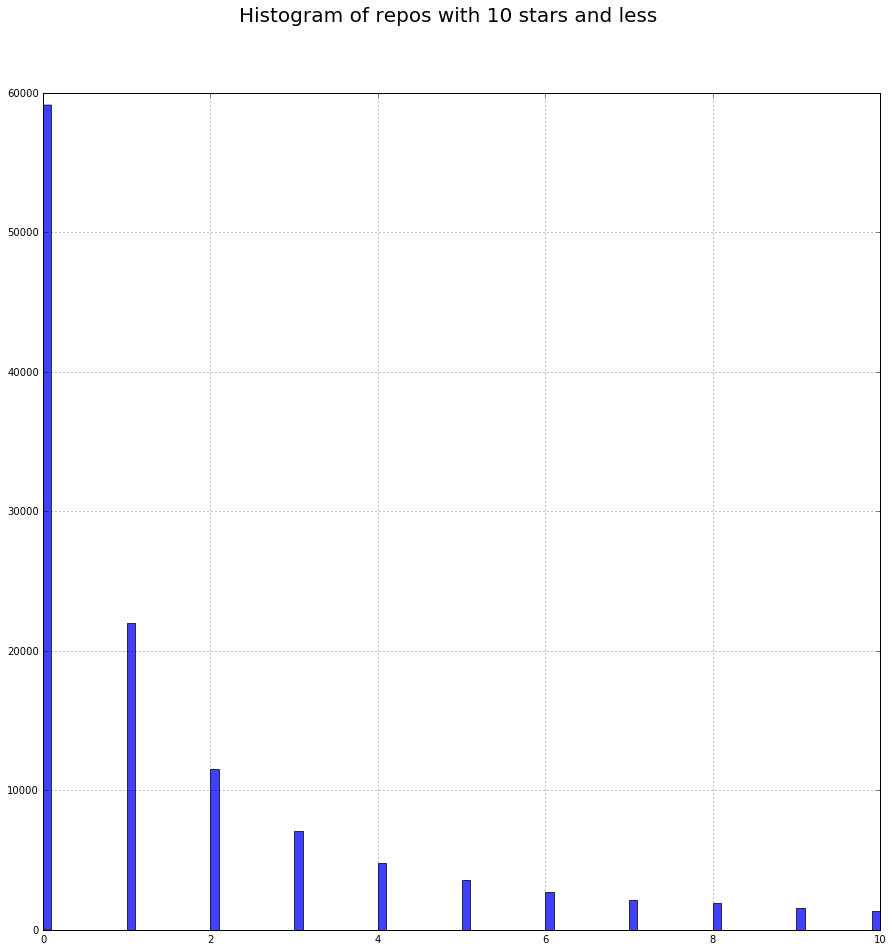

In [11]:

import matplotlib.mlab as mlab

mu, sigma = 100, 15
# the histogram of the data
plt.figure(figsize=(15, 15)).suptitle('Histogram of repos with 10 stars and less', size=20)
n, bins, patches = plt.hist(Y[:, 0], 100, range=(0, 10), normed=False, alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.grid(True)

plt.show()

This plot shows histogram for repositories with 10 and less stars, most of the repositories are in this range and overwhelming majory has 0 stars.

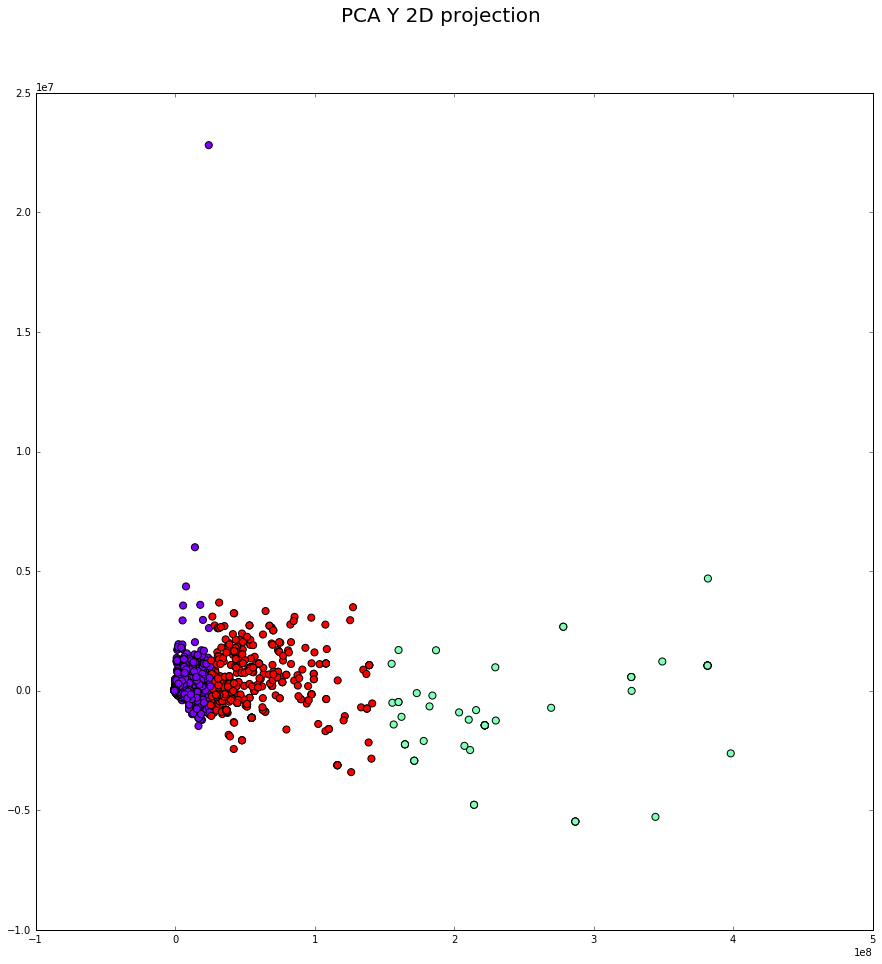

In [12]:
# We cluster popularity features into 3 groups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Y)
transformed = pca.transform(Y)

est = KMeans(3)
est.fit(transformed)

y_kmeans = est.predict(transformed)
plt.figure(figsize=(15, 15)).suptitle('PCA Y 2D projection', size=20)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y_kmeans, s=50, cmap='rainbow');

First we apply principal component analysis to popularity indicators and afterwards we cluster the dataset using `kMeans`.

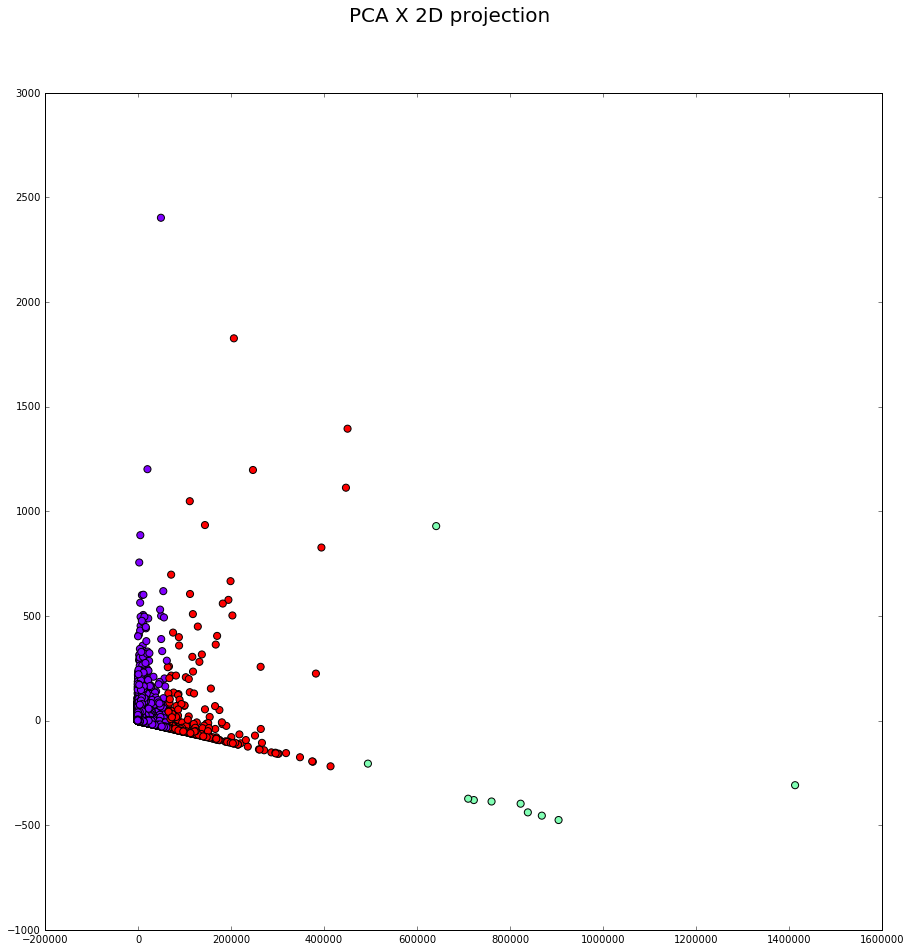

In [13]:
# We cluster project features into 3 groups
est = KMeans(3)  # 4 clusters
est.fit(X)

x_kmeans = est.predict(X)


pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 15)).suptitle('PCA X 2D projection', size=20)
plt.scatter(transformed[:, 0], transformed[:, 1], c=x_kmeans, s=50, cmap='rainbow');

First we apply principal component analysis to repos features and afterwards we cluster the dataset using `kMeans`.

# Correlations

We try to find whether any of the features are in correlation. Using Pearson correlation coefficient/

### First are popularity indicators

In [14]:
# We look for correlations between project features.
from sklearn import preprocessing
from scipy.stats.stats import pearsonr   

for i in range(0, Y.shape[1]):
    for j in range(i + 1, Y.shape[1]):
        a = preprocessing.scale(Y[:, i])
        b = preprocessing.scale(Y[:, j])
        printmd("**{}** <--> **{}**".format(Y_labels[i], Y_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**stars** <--> **forks**

0.86%


**stars** <--> **subscribers**

0.70%


**stars** <--> **downloads**

0.08%


**stars** <--> **avg_per_month**

0.08%


**stars** <--> **last_month_downloads**

0.08%


**stars** <--> **last_week_downloads**

0.08%


**forks** <--> **subscribers**

0.66%


**forks** <--> **downloads**

0.04%


**forks** <--> **avg_per_month**

0.04%


**forks** <--> **last_month_downloads**

0.04%


**forks** <--> **last_week_downloads**

0.04%


**subscribers** <--> **downloads**

0.04%


**subscribers** <--> **avg_per_month**

0.04%


**subscribers** <--> **last_month_downloads**

0.04%


**subscribers** <--> **last_week_downloads**

0.04%


**downloads** <--> **avg_per_month**

1.00%


**downloads** <--> **last_month_downloads**

0.98%


**downloads** <--> **last_week_downloads**

0.96%


**avg_per_month** <--> **last_month_downloads**

0.98%


**avg_per_month** <--> **last_week_downloads**

0.97%


**last_month_downloads** <--> **last_week_downloads**

0.99%


Stars, forks and stars, subscribers correlate quite well. However to my suprise stars and number of downloads does not correlate at all.

Different types of downloads have high correlation.

### Now we try repos features

In [15]:
for i in range(0, X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(X[:, j])
        printmd("**{}** <--> **{}**".format(X_labels[i], X_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**open_issues_count** <--> **size**

0.29%


**open_issues_count** <--> **dependencies_count**

0.10%


**open_issues_count** <--> **mainteiners_count**

0.07%


**open_issues_count** <--> **contributors_count**

0.10%


**open_issues_count** <--> **has_tests**

0.00%


**open_issues_count** <--> **has_readme**

0.01%


**size** <--> **dependencies_count**

0.05%


**size** <--> **mainteiners_count**

0.03%


**size** <--> **contributors_count**

0.01%


**size** <--> **has_tests**

-0.03%


**size** <--> **has_readme**

0.00%


**dependencies_count** <--> **mainteiners_count**

0.10%


**dependencies_count** <--> **contributors_count**

0.18%


**dependencies_count** <--> **has_tests**

0.02%


**dependencies_count** <--> **has_readme**

0.06%


**mainteiners_count** <--> **contributors_count**

0.05%


**mainteiners_count** <--> **has_tests**

0.03%


**mainteiners_count** <--> **has_readme**

0.05%


**contributors_count** <--> **has_tests**

0.01%


**contributors_count** <--> **has_readme**

0.01%


**has_tests** <--> **has_readme**

0.15%


There is only one small correlation between size of the project and number of opened issues.


### Now we try correlations between features and popularity indicators.

In [16]:
# We look for correlations between project features and popularity indicators. 
for i in range(0, X.shape[1]):
    for j in range(0, Y.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(Y[:, j])
        printmd("**{}** <--> **{}**".format(X_labels[i], Y_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**open_issues_count** <--> **stars**

0.49%


**open_issues_count** <--> **forks**

0.40%


**open_issues_count** <--> **subscribers**

0.39%


**open_issues_count** <--> **downloads**

0.04%


**open_issues_count** <--> **avg_per_month**

0.04%


**open_issues_count** <--> **last_month_downloads**

0.03%


**open_issues_count** <--> **last_week_downloads**

0.03%


**size** <--> **stars**

0.17%


**size** <--> **forks**

0.16%


**size** <--> **subscribers**

0.16%


**size** <--> **downloads**

0.01%


**size** <--> **avg_per_month**

0.01%


**size** <--> **last_month_downloads**

0.01%


**size** <--> **last_week_downloads**

0.01%


**dependencies_count** <--> **stars**

0.06%


**dependencies_count** <--> **forks**

0.03%


**dependencies_count** <--> **subscribers**

0.06%


**dependencies_count** <--> **downloads**

0.02%


**dependencies_count** <--> **avg_per_month**

0.01%


**dependencies_count** <--> **last_month_downloads**

0.01%


**dependencies_count** <--> **last_week_downloads**

0.01%


**mainteiners_count** <--> **stars**

0.05%


**mainteiners_count** <--> **forks**

0.03%


**mainteiners_count** <--> **subscribers**

0.11%


**mainteiners_count** <--> **downloads**

0.05%


**mainteiners_count** <--> **avg_per_month**

0.05%


**mainteiners_count** <--> **last_month_downloads**

0.05%


**mainteiners_count** <--> **last_week_downloads**

0.05%


**contributors_count** <--> **stars**

0.04%


**contributors_count** <--> **forks**

0.02%


**contributors_count** <--> **subscribers**

0.02%


**contributors_count** <--> **downloads**

0.10%


**contributors_count** <--> **avg_per_month**

0.10%


**contributors_count** <--> **last_month_downloads**

0.08%


**contributors_count** <--> **last_week_downloads**

0.08%


**has_tests** <--> **stars**

-0.00%


**has_tests** <--> **forks**

-0.00%


**has_tests** <--> **subscribers**

0.00%


**has_tests** <--> **downloads**

0.02%


**has_tests** <--> **avg_per_month**

0.02%


**has_tests** <--> **last_month_downloads**

0.03%


**has_tests** <--> **last_week_downloads**

0.03%


**has_readme** <--> **stars**

0.01%


**has_readme** <--> **forks**

0.00%


**has_readme** <--> **subscribers**

0.01%


**has_readme** <--> **downloads**

0.02%


**has_readme** <--> **avg_per_month**

0.02%


**has_readme** <--> **last_month_downloads**

0.02%


**has_readme** <--> **last_week_downloads**

0.02%


# Applying MDS to find clusters

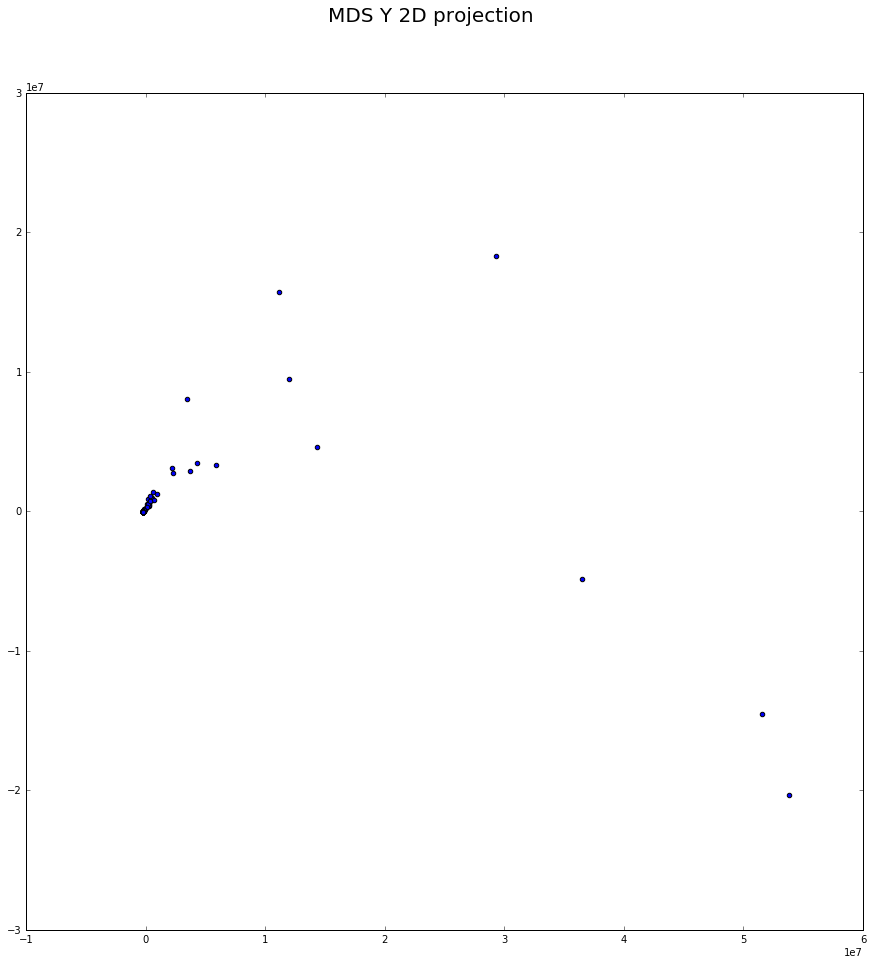

In [17]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
Y_mds = mds.fit_transform(Y[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS Y 2D projection', size=20)
plt.subplot(111)
plt.scatter(Y_mds[0:,0], Y_mds[0:,1])

plt.show()

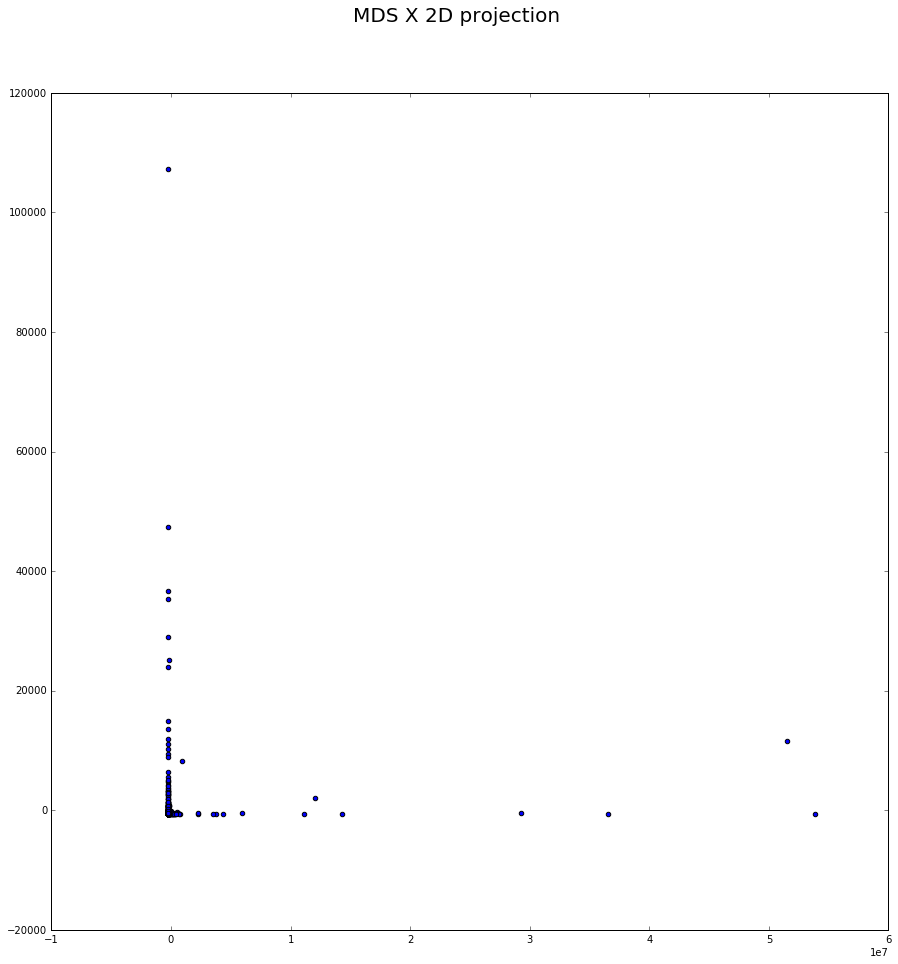

In [18]:
mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
X_mds = mds.fit_transform(X[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS X 2D projection', size=20)
plt.subplot(111)

plt.scatter(Y_mds[0:,0], X_mds[0:,1])

plt.show()

# Graphs that show distribution of popularity indicators

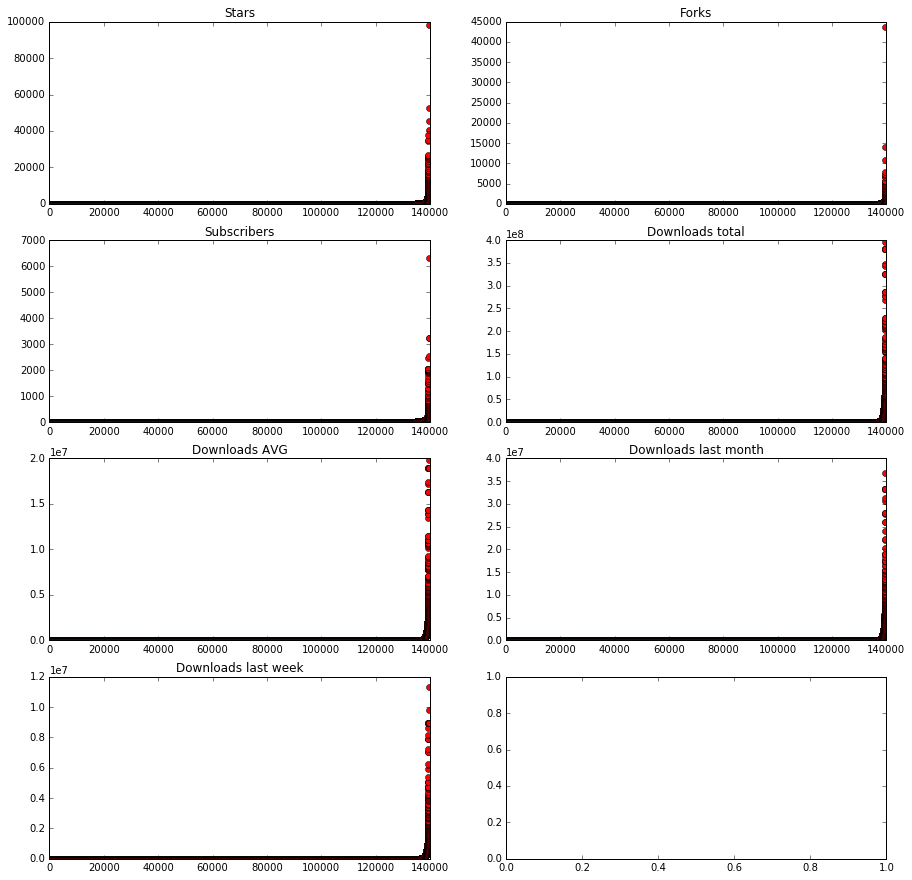

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes[0, 0].plot(np.sort(Y[:, shared.STARS]), 'ro')
axes[0, 0].set_title('Stars')

axes[0, 1].plot(np.sort(Y[:, shared.FORKS]), 'ro')
axes[0, 1].set_title('Forks')

axes[1, 0].plot(np.sort(Y[:, shared.SUBSCRIBERS]), 'ro')
axes[1, 0].set_title('Subscribers')

axes[1, 1].plot(np.sort(Y[:, shared.TOTAL_DOWNLOADS]), 'ro')
axes[1, 1].set_title('Downloads total')

axes[2, 0].plot(np.sort(Y[:, shared.AVERAGE_PER_MONTH_DOWNLOADS]), 'ro')
axes[2, 0].set_title('Downloads AVG')

axes[2, 1].plot(np.sort(Y[:, shared.LAST_MONTH_DOWNLOADS]), 'ro')
axes[2, 1].set_title('Downloads last month')

axes[3, 0].plot(np.sort(Y[:, shared.LAST_WEEK_DOWNLOADS]), 'ro')
axes[3, 0].set_title('Downloads last week')


plt.show()

Distribution of popularity indicators is very imbalanced, either the package is not popular at all or it grows really fast.

# KMeans on number of downloads

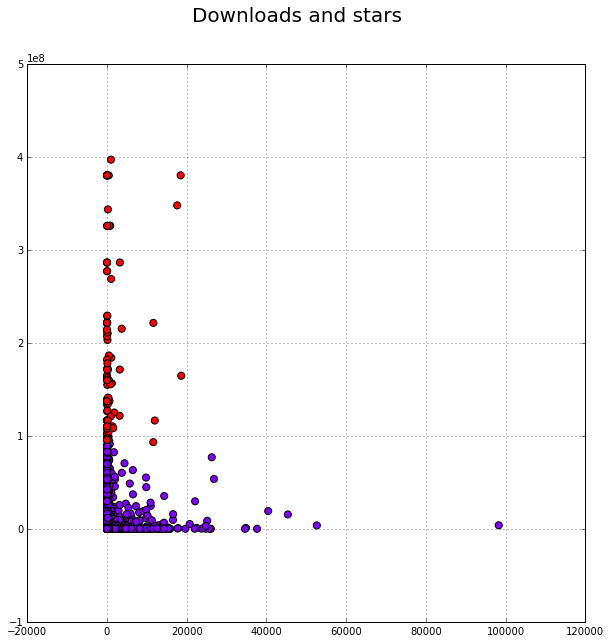

In [22]:
from sklearn.cluster import KMeans
est = KMeans(2)
est.fit(Y[:, [0, shared.TOTAL_DOWNLOADS]])
y_kmeans = est.predict(Y[:, [0, shared.TOTAL_DOWNLOADS]])

plt.figure(figsize=(10, 10)).suptitle('Downloads and stars', size=20)
plt.ylabel = "Downloads"
plt.xlabel = "Stars"
plt.scatter(Y[:, shared.STARS], Y[:, shared.TOTAL_DOWNLOADS], c=y_kmeans, s=50, cmap='rainbow');

plt.grid()
plt.show()